# Practical 2

Simulate the bias-variance trade-off using polynomial regression on synthetic data and explore the impact of high-dimensional feature spaces on model performance using PCA.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [19]:
# --- Generate Synthetic Data ---

np.random.seed(42)
n = 200
X = np.random.uniform(-3, 3, size=(n, 1))
y = (np.sin(1.2 * X) + 0.5 * np.cos(2.0 * X)).ravel() + np.random.normal(scale=0.25, size=n)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

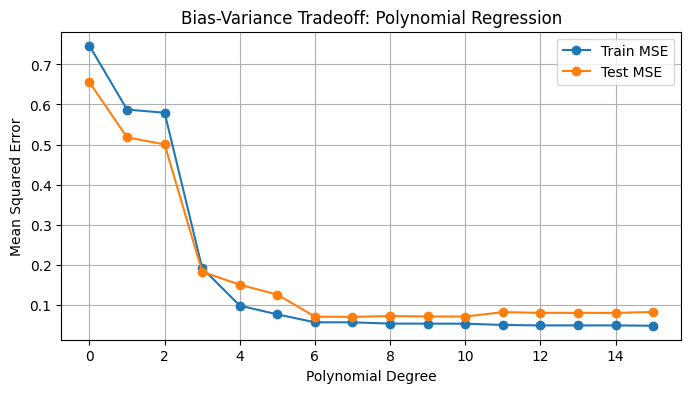

In [20]:
# --- Bias–Variance Simulation (Polynomial Regression) ---

degrees = range(0, 16)
train_mse, test_mse = [], []

for d in degrees:
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=d, include_bias=True)),
        ('scaler', StandardScaler()),
        ('lin', LinearRegression())
    ])
    model.fit(X_train, y_train)
    train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(8,4))
plt.plot(degrees, train_mse, marker='o', label='Train MSE')
plt.plot(degrees, test_mse, marker='o', label='Test MSE')
plt.xlabel('Polynomial Degree'); plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff: Polynomial Regression')
plt.legend(); plt.grid(True)
plt.show()

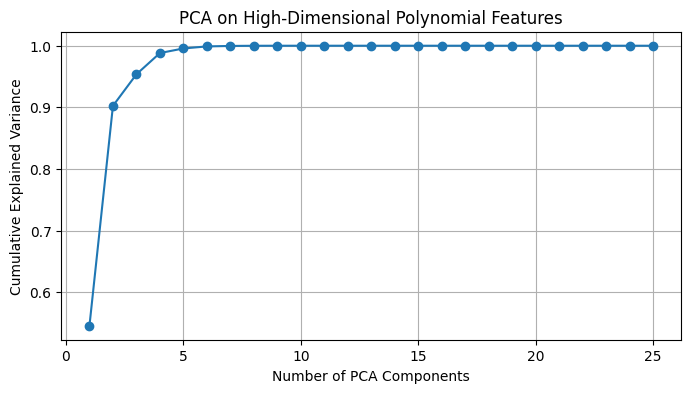

In [21]:
# --- High-Dimensional Polynomial Features + PCA ---

high_deg = 25
poly = PolynomialFeatures(degree=high_deg, include_bias=False)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Keep same split for fairness
X_poly_train = scaler.transform(poly.transform(X_train))
X_poly_test  = scaler.transform(poly.transform(X_test))

pca = PCA()
pca.fit(X_poly_train)
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel('Number of PCA Components'); plt.ylabel('Cumulative Explained Variance')
plt.title('PCA on High-Dimensional Polynomial Features')
plt.grid(True)
plt.show()

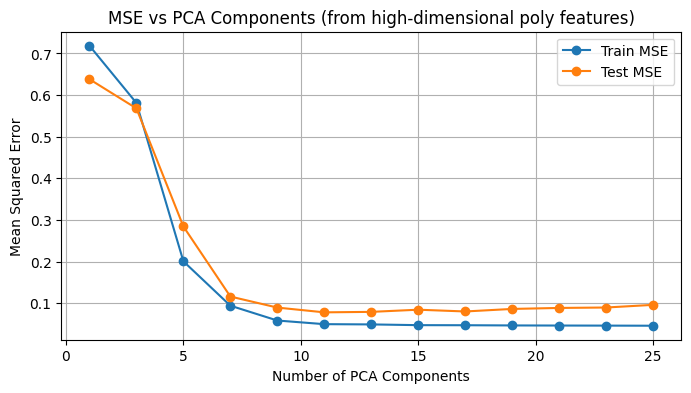

In [22]:
# --- Train on PCA-Reduced Spaces ---

n_max = min(60, X_poly_train.shape[1])
n_list = list(range(1, n_max+1, 2))
mse_train_pca, mse_test_pca = [], []

for k in n_list:
    pca_k = PCA(n_components=k, random_state=42)
    Xtr_k = pca_k.fit_transform(X_poly_train)
    Xt_k  = pca_k.transform(X_poly_test)
    lr = LinearRegression()
    lr.fit(Xtr_k, y_train)
    mse_train_pca.append(mean_squared_error(y_train, lr.predict(Xtr_k)))
    mse_test_pca.append(mean_squared_error(y_test, lr.predict(Xt_k)))

plt.figure(figsize=(8,4))
plt.plot(n_list, mse_train_pca, marker='o', label='Train MSE')
plt.plot(n_list, mse_test_pca, marker='o', label='Test MSE')
plt.xlabel('Number of PCA Components'); plt.ylabel('Mean Squared Error')
plt.title('MSE vs PCA Components (from high-dimensional poly features)')
plt.legend(); plt.grid(True)
plt.show()

In [23]:
# --- Best Choices ---

best_deg = degrees[np.argmin(test_mse)]
best_k   = n_list[np.argmin(mse_test_pca)]
print(f"Best polynomial degree (lowest test MSE): {best_deg}")
print(f"Best PCA n_components (lowest test MSE): {best_k}")

Best polynomial degree (lowest test MSE): 7
Best PCA n_components (lowest test MSE): 11
